<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/11_math_II/blob/main/2_linear_algebra/3_class_/3_class_addition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

### [Video de apoyo a la lectura interactiva y experimental de este cuaderno sobre la adición de vectores]()

Modelo pedagógico de enseñanza: [Aula invertida](https://udeaeduco-my.sharepoint.com/:b:/g/personal/marco_canas_udea_edu_co/EelvUuuDvaVAmJUCFE-XNicB_MPrWZfrqbpx7USTUovKUQ?e=npa4Xa) 

## Trazar vectores

Para trazar vectores usaremos **matplotlib**, así que comencemos importándolo (para obtener detalles sobre matplotlib, consulte el [tutorial de matplotlib](https://matplotlib.org/stable/tutorials/index.html)):

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
u = np.array([2, 5])
v = np.array([3, 1])

Cada uno de estos vectores tiene 2 elementos, por lo que se pueden representar gráficamente fácilmente en un gráfico 2D, por ejemplo, como puntos:

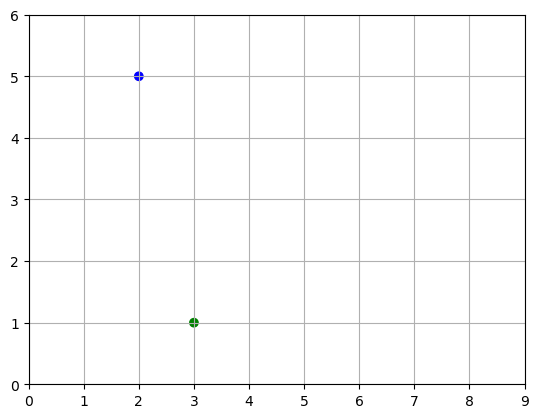

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

u = np.array([2, 5])
v = np.array([3, 1])

x_coords, y_coords = zip(u, v) # utilidad de la función zip para descomponer los vectores. 

plt.scatter(x_coords, y_coords, color=["b","g"]) # scatter significa dispersión o gráfico de puntos

plt.axis([0, 9, 0, 6]) # definimos un rectángulo de visualización 
plt.grid(alpha = 1.0)

plt.savefig('dos_vectores2D.jpg')

plt.show()

# Los vectores como flechas

Los vectores también se pueden representar como flechas. Vamos a crear una pequeña función de conveniencia para dibujar bonitas flechas:

In [ ]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

Ahora dibujemos los vectores **u** y **v** como flechas:

In [ ]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plt.axis([0, 9, 0, 6])
plt.grid()
plt.show()

### Vectores 3D
Trazar vectores 3D también es relativamente sencillo. Primero, creemos dos vectores 3D:

In [ ]:
a = np.array([1, 2, 8])
b = np.array([5, 6, 3])

Ahora vamos a trazarlos usando `Axes3D de matplotlib:

In [ ]:
subplot3d = plt.subplot(111, projection='3d')
x_coords, y_coords, z_coords = zip(a,b)
subplot3d.scatter(x_coords, y_coords, z_coords)
subplot3d.set_zlim3d([0, 9])
plt.show()

Es un poco difícil visualizar exactamente dónde están estos dos puntos en el espacio, así que agreguemos líneas verticales. Crearemos una pequeña función de conveniencia para trazar una lista de vectores 3D con líneas verticales adjuntas:

In [ ]:
def plot_vectors3d(ax, vectors3d, z0, **options):
    for v in vectors3d:
        x, y, z = v
        ax.plot([x,x], [y,y], [z0, z], color="gray", linestyle='dotted', marker=".")
    x_coords, y_coords, z_coords = zip(*vectors3d)
    ax.scatter(x_coords, y_coords, z_coords, **options)

subplot3d = plt.subplot(111, projection='3d')
subplot3d.set_zlim([0, 9])
plot_vectors3d(subplot3d, [a,b], 0, color=("r","b"))
plt.show()

## Norma

La norma de un vector $\textbf{u}$, anotada $\left \Vert \textbf{u} \right \|$, es una medida de la longitud (también conocida como la magnitud) de $\textbf{u}$. Hay múltiples normas posibles, pero la más común (y la única que discutiremos aquí) es la norma euclidiana, que se define como:

$\left \Vert \textbf{u} \right \| = \sqrt{\sum_{i}{\textbf{u}_i}^2}$

Esa es la raíz cuadrada de la suma de todos los cuadrados de los componentes de $\textbf{u}$. Podríamos implementar esto fácilmente en Python puro, recordando que $\sqrt x = x^{\frac{1}{2}}$

In [ ]:
def vector_norm(vector):
    squares = [element**2 for element in vector]
    return sum(squares)**0.5

print("||", u, "|| =")
vector_norm(u)

Sin embargo, es mucho más eficiente usar la función `norm` de NumPy, disponible en el módulo `linalg` (**Lin**ear **Alg**ebra):

In [ ]:
import numpy.linalg as LA

LA.norm(u)

Tracemos un pequeño diagrama para confirmar que la longitud del vector $\textbf{u}$ es de hecho $\approx5.4$:

In [ ]:
radius = LA.norm(u)
plt.gca().add_artist(plt.Circle((0,0), radius, color="#DDDDDD"))
plot_vector2d(u, color="red")
plt.axis([0, 8.7, 0, 6])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Suma
Se pueden sumar vectores del mismo tamaño. La suma se realiza *por elementos*:

In [ ]:
print(" ", u)
print("+", v)
print("-"*10)
u + v

Veamos cómo se ve gráficamente la suma de vectores:

In [6]:
def plot_vector2d(vector2d, origin=[0, 0], **options):
    return plt.arrow(origin[0], origin[1], vector2d[0], vector2d[1],
              head_width=0.2, head_length=0.3, length_includes_head=True,
              **options)

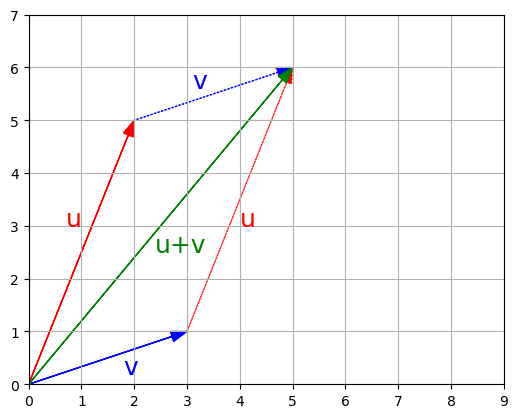

In [7]:
plot_vector2d(u, color="r")
plot_vector2d(v, color="b")
plot_vector2d(v, origin=u, color="b", linestyle="dotted")
plot_vector2d(u, origin=v, color="r", linestyle="dotted")
plot_vector2d(u+v, color="g")
plt.axis([0, 9, 0, 7])
plt.gca().set_aspect("equal")
plt.text(0.7, 3, "u", color="r", fontsize=18)
plt.text(4, 3, "u", color="r", fontsize=18)
plt.text(1.8, 0.2, "v", color="b", fontsize=18)
plt.text(3.1, 5.6, "v", color="b", fontsize=18)
plt.text(2.4, 2.5, "u+v", color="g", fontsize=18)
plt.grid()

plt.savefig('suma_geometrica.jpg')

plt.show()

La suma de vectores es **conmutativa**, lo que significa que $\textbf{u} + \textbf{v} = \textbf{v} + \textbf{u}$. Puedes verlo en la imagen anterior: siguiendo $\textbf{u}$ *luego* $\textbf{v}$ lleva al mismo punto que siguiendo $\textbf{v}$ *luego* $\textbf{u}$ ps

Vector addition is also **associative**, meaning that $\textbf{u} + (\textbf{v} + \textbf{w}) = (\textbf{u} + \textbf{v}) + \textbf{w}$.

# Traslación geométrica

Si tiene una forma definida por una cantidad de puntos (vectores) y agrega un vector $\textbf{v}$ a todos estos puntos, entonces toda la forma se desplaza $\textbf{v}$. Esto se llama [traducción geométrica] (https://en.wikipedia.org/wiki/Translation_%28geometry%29):

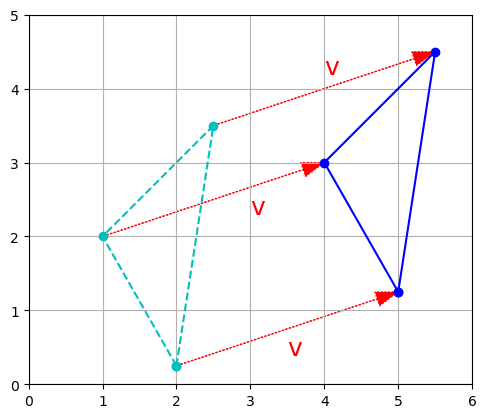

In [9]:
t1 = np.array([2, 0.25])
t2 = np.array([2.5, 3.5])
t3 = np.array([1, 2])

x_coords, y_coords = zip(t1, t2, t3, t1)
plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(v, t1, color="r", linestyle=":")
plot_vector2d(v, t2, color="r", linestyle=":")
plot_vector2d(v, t3, color="r", linestyle=":")

t1b = t1 + v
t2b = t2 + v
t3b = t3 + v

x_coords_b, y_coords_b = zip(t1b, t2b, t3b, t1b)
plt.plot(x_coords_b, y_coords_b, "b-", x_coords_b, y_coords_b, "bo")

plt.text(4, 4.2, "v", color="r", fontsize=18)
plt.text(3, 2.3, "v", color="r", fontsize=18)
plt.text(3.5, 0.4, "v", color="r", fontsize=18)

plt.axis([0, 6, 0, 5])
plt.gca().set_aspect("equal")
plt.grid()

plt.savefig('traslacion.jpg')
plt.show()

Finalmente, restar un vector es como sumar el vector opuesto.

## Multiplication by a scalar

Los vectores se pueden multiplicar por escalares. Todos los elementos del vector se multiplican por ese número, por ejemplo:

In [ ]:
print("1.5 *", u, "=")

1.5 * u

Gráficamente, la multiplicación escalar da como resultado cambiar la escala de una figura, de ahí el nombre *escalar*. La distancia desde el origen (el punto en coordenadas iguales a cero) también se multiplica por el escalar. Por ejemplo, ampliemos la escala por un factor de `k = 2.5`:

In [ ]:
k = 2.5
t1c = k * t1
t2c = k * t2
t3c = k * t3

plt.plot(x_coords, y_coords, "c--", x_coords, y_coords, "co")

plot_vector2d(t1, color="r")
plot_vector2d(t2, color="r")
plot_vector2d(t3, color="r")

x_coords_c, y_coords_c = zip(t1c, t2c, t3c, t1c)
plt.plot(x_coords_c, y_coords_c, "b-", x_coords_c, y_coords_c, "bo")

plot_vector2d(k * t1, color="b", linestyle=":")
plot_vector2d(k * t2, color="b", linestyle=":")
plot_vector2d(k * t3, color="b", linestyle=":")

plt.axis([0, 9, 0, 9])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

As you might guess, dividing a vector by a scalar is equivalent to multiplying by its multiplicative inverse (reciprocal):

$\dfrac{\textbf{u}}{\lambda} = \dfrac{1}{\lambda} \times \textbf{u}$

Scalar multiplication is **commutative**: $\lambda \times \textbf{u} = \textbf{u} \times \lambda$.

It is also **associative**: $\lambda_1 \times (\lambda_2 \times \textbf{u}) = (\lambda_1 \times \lambda_2) \times \textbf{u}$.

Finally, it is **distributive** over addition of vectors: $\lambda \times (\textbf{u} + \textbf{v}) = \lambda \times \textbf{u} + \lambda \times \textbf{v}$.

## Zero, unit and normalized vectors
* A **zero-vector** is a vector full of 0s.
* A **unit vector** is a vector with a norm equal to 1.
* The **normalized vector** of a non-null vector $\textbf{v}$, noted $\hat{\textbf{v}}$, is the unit vector that points in the same direction as $\textbf{v}$. It is equal to: $\hat{\textbf{v}} = \dfrac{\textbf{v}}{\left \Vert \textbf{v} \right \|}$



## Vectores cero, unitarios y normalizados
* Un **vector cero** es un vector lleno de ceros.
* Un **vector unitario** es un vector con una norma igual a 1.
* El **vector normalizado** de un vector no nulo $\textbf{v}$, anotado $\hat{\textbf{v}}$, es el vector unitario que apunta en la misma dirección que $\textbf{ v}$. Es igual a: $\hat{\textbf{v}} = \dfrac{\textbf{v}}{\left \Vert \textbf{v} \right \|}$

In [ ]:
plt.gca().add_artist(plt.Circle((0, 0), 1, color='c'))
plt.plot(0, 0, "ko")
plot_vector2d(v / LA.norm(v), color="k", zorder=10)
plot_vector2d(v, color="b", linestyle=":", zorder=15)
plt.text(0.3, 0.3, r"$\hat{v}$", color="k", fontsize=18)
plt.text(1.5, 0.7, "$v$", color="b", fontsize=18)
plt.axis([-1.5, 5.5, -1.5, 3.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

## Dot product

### Definition

The dot product (also called *scalar product* or *inner product* in the context of the Euclidian space) of two vectors $\textbf{u}$ and $\textbf{v}$ is a useful operation that comes up fairly often in linear algebra. It is noted $\textbf{u} \cdot \textbf{v}$, or sometimes $⟨\textbf{u}|\textbf{v}⟩$ or $(\textbf{u}|\textbf{v})$, and it is defined as:

El producto escalar (también llamado *producto escalar* o *producto interno* en el contexto del espacio euclidiano) de dos vectores $\textbf{u}$ y $\textbf{v}$ es una operación útil que surge con bastante frecuencia en álgebra lineal. 

Se denota por $\textbf{u} \cdot \textbf{v}$, o a veces $⟨\textbf{u}|\textbf{v}⟩$ o $(\textbf{u}|\textbf{v}) $, y se define como:

$\textbf{u} \cdot \textbf{v} = \left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \| \times cos(\theta)$

where $\theta$ is the angle between $\textbf{u}$ and $\textbf{v}$.

Another way to calculate the dot product is:

$\textbf{u} \cdot \textbf{v} = \sum_i{\textbf{u}_i \times \textbf{v}_i}$

### In python

El producto punto es bastante simple de implementar:

In [ ]:
def dot_product(v1, v2):
    return sum(v1i * v2i for v1i, v2i in zip(v1, v2))

dot_product(u, v)

Pero NumPy proporciona una implementación *mucho* más eficiente con la función `np.dot()`:

In [ ]:
np.dot(u, v)

De manera equivalente, puede usar el método `dot` de `ndarray`s:

In [ ]:
u.dot(v)

**Caution**: the `*` operator will perform an *elementwise* multiplication, *NOT* a dot product:

In [ ]:
print("  ",u)
print("* ",v, "(NOT a dot product)")
print("-"*10)

u * v

### Main properties

* The dot product is **commutative**: $\textbf{u} \cdot \textbf{v} = \textbf{v} \cdot \textbf{u}$.
* The dot product is only defined between two vectors, not between a scalar and a vector. This means that we cannot chain dot products: for example, the expression $\textbf{u} \cdot \textbf{v} \cdot \textbf{w}$ is not defined since $\textbf{u} \cdot \textbf{v}$ is a scalar and $\textbf{w}$ is a vector.

* This also means that the dot product is **NOT associative**: $(\textbf{u} \cdot \textbf{v}) \cdot \textbf{w} ≠ \textbf{u} \cdot (\textbf{v} \cdot \textbf{w})$ since neither are defined.
* However, the dot product is **associative with regards to scalar multiplication**: $\lambda \times (\textbf{u} \cdot \textbf{v}) = (\lambda \times \textbf{u}) \cdot \textbf{v} = \textbf{u} \cdot (\lambda \times \textbf{v})$
* Finally, the dot product is **distributive** over addition of vectors: $\textbf{u} \cdot (\textbf{v} + \textbf{w}) = \textbf{u} \cdot \textbf{v} + \textbf{u} \cdot \textbf{w}$.

### Calculating the angle between vectors

One of the many uses of the dot product is to calculate the angle between two non-zero vectors. Looking at the dot product definition, we can deduce the following formula:

$\theta = \arccos{\left ( \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| \times \left \Vert \textbf{v} \right \|} \right ) }$

Note that if $\textbf{u} \cdot \textbf{v} = 0$, it follows that $\theta = \dfrac{π}{2}$. In other words, if the dot product of two non-null vectors is zero, it means that they are orthogonal.

Let's use this formula to calculate the angle between $\textbf{u}$ and $\textbf{v}$ (in radians):

In [ ]:
def vector_angle(u, v):
    cos_theta = u.dot(v) / LA.norm(u) / LA.norm(v)
    return np.arccos(cos_theta.clip(-1, 1))

theta = vector_angle(u, v)
print("Angle =", theta, "radians")
print("      =", theta * 180 / np.pi, "degrees")

Note: due to small floating point errors, `cos_theta` may be very slightly outside the $[-1, 1]$ interval, which would make `arccos` fail. This is why we clipped the value within the range, using NumPy's `clip` function.

### Projecting a point onto an axis

The dot product is also very useful to project points onto an axis. The projection of vector $\textbf{v}$ onto $\textbf{u}$'s axis is given by this formula:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = \dfrac{\textbf{u} \cdot \textbf{v}}{\left \Vert \textbf{u} \right \| ^2} \times \textbf{u}$

Which is equivalent to:

$\textbf{proj}_{\textbf{u}}{\textbf{v}} = (\textbf{v} \cdot \hat{\textbf{u}}) \times \hat{\textbf{u}}$

In [ ]:
u_normalized = u / LA.norm(u)
proj = v.dot(u_normalized) * u_normalized

plot_vector2d(u, color="r")
plot_vector2d(v, color="b")

plot_vector2d(proj, color="k", linestyle=":")
plt.plot(proj[0], proj[1], "ko")

plt.plot([proj[0], v[0]], [proj[1], v[1]], "b:")

plt.text(1, 2, "$proj_u v$", color="k", fontsize=18)
plt.text(1.8, 0.2, "$v$", color="b", fontsize=18)
plt.text(0.8, 3, "$u$", color="r", fontsize=18)

plt.axis([0, 8, 0, 5.5])
plt.gca().set_aspect("equal")
plt.grid()
plt.show()

# What's next?
This concludes this introduction to Linear Algebra. Although these basics cover most of what you will need to know for Machine Learning, if you wish to go deeper into this topic there are many options available: Linear Algebra [books](https://linear.axler.net/), [Khan Academy](https://www.khanacademy.org/math/linear-algebra) lessons, or just [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra) pages.

# ¿Que sigue?
Con esto concluye esta introducción al Álgebra Lineal. Aunque estos conceptos básicos cubren la mayor parte de lo que necesitará saber para el aprendizaje automático, si desea profundizar en este tema, hay muchas opciones disponibles: Álgebra lineal [libros] (https://linear.axler.net/), [ Lecciones de Khan Academy](https://www.khanacademy.org/math/linear-algebra), o simplemente páginas de [Wikipedia](https://en.wikipedia.org/wiki/Linear_algebra).

## Tareas

* Accede, repetida y libremente, a los contenidos y actividades facilitados por el docente Marco Cañas.
* Realiza las actividades propuestas

## Actividasdes sugeridas durante la clase  

* Realiza las actividades (debates, exposiciones orales, informes, diario de aprendizaje, cuaderno de trabajo cooperativo,...).
* Recibe retroalimentación inmediata del docente y de sus compañeros y compañeras.
* Accede, si fuera necesario, a las actividades previas facilitadas por el docente

* crea tres vectores 2 dimensionales utilizando la función `np.array()` de numpy. 


## Evaluación

## Referentes   



* [Tutorial de matplotlib para trazar vectores](https://matplotlib.org/stable/tutorials/index.html): 